<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB

length of y test is: 83



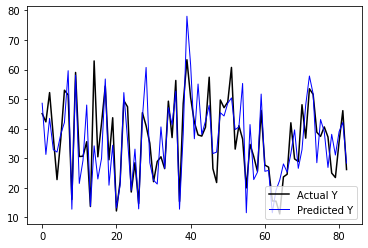


The RMS Error value for DTR Regression is 8.3255594261909



In [3]:
import pandas as pd
import random
import numpy as np
from numpy import mean
from numpy import std
from pandas import DataFrame
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# random Number generation
# what are we using this for ? basically for numerical random no generation used in hyperparameter optimization
# can use either.
from scipy.stats import uniform as sp_rand
from scipy.stats import uniform

# for splitting data into training and test
from sklearn.model_selection import train_test_split

# for hyperparameter optimization
# can also use gridSearch or Optuner
# i decided to go with RandomSearch because its efficient.
from sklearn.model_selection import RandomizedSearchCV

# for evaluation of scoring-root mean square error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

# importing linear models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# importing non-linear models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


# load the dataset, returns X and y elements.

def load_dataset():
    df = pd.read_excel(r'C:/Users/Admin/Desktop/Real-estate-valuation-data-set.xlsx')#, index_col=0)
    df.info()
    X = df.drop(['Y house price of unit area'], axis=1)
    y = df['Y house price of unit area'].values
    return df, X, y


# it is basically a dictionary of the models.
def get_models(models=dict()):
    # linear models
    models['lr'] = LinearRegression()
    alpha = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    for a in alpha:
        models['lasso-' + str(a)] = Lasso(alpha=a)
    for a in alpha:
        models['ridge-' + str(a)] = Ridge(alpha=a)

    # non-linear models
    n_neighbors = 100
    # for k in n_neighbors:
    models['knn-'] = KNeighborsRegressor(n_neighbors=10)
    models['dtr'] = DecisionTreeRegressor()

    # print('Defined %d models' % len(models))
    return models


# create a feature preparation pipeline for a model
# look into the pipeline function on web.

def make_pipeline(model):
    steps = list()
    # standardization
    steps.append(('standardize', StandardScaler()))
    # normalization
    steps.append(('normalize', MinMaxScaler()))
    # the model
    steps.append(('model', model))
    # create pipeline
    pipeline = Pipeline(steps=steps)
    return pipeline


# evaluate a single model
def evaluate_model(X, y, model, folds, metric):
    # create the pipeline
    pipeline = make_pipeline(model)
    # evaluate model
    scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
    return scores


# evaluate a model and try to trap errors and and hide warnings
# basically just ignore the warnings.

def robust_evaluate_model(X, y, model, folds, metric):
    # scores = None
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            scores = evaluate_model(X, y, model, folds, metric)
    except:
        scores = None
    return scores


# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, metric='accuracy'):
    results = dict()
    for name, model in models.items():
        # evaluate the model
        # scores = robust_evaluate_model(X, y, model, folds, metric)

        scores = evaluate_model(X, y, model, folds, metric)
        # show process
        if scores is not None:
            # store a result
            results[name] = scores
            mean_score, std_score = mean(scores), std(scores)
            # print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
        else:
            print('>%s: error' % name)
    return results


# print and plot the top n results
def summarize_results(results, maximize=True, top_n=20):
    # check for no results
    if len(results) == 0:
        print('no results')
        return
    # determine how many results to summarize
    n = min(top_n, len(results))
    # create a list of (name, mean(scores)) tuples
    mean_scores = [(k, mean(v)) for k, v in results.items()]
    # sort tuples by mean score
    mean_scores = sorted(mean_scores, key=lambda x: x[1])
    # reverse for descending order (e.g. for accuracy)
    if maximize:
        mean_scores = list(reversed(mean_scores))
    # retrieve the top n for summarization
    names = [x[0] for x in mean_scores[:n]]
    scores = [results[x[0]] for x in mean_scores[:n]]
    # print the top n
    print()
    for i in range(n):
        name = names[i]
        mean_score, std_score = mean(results[name]), std(results[name])
        # print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
    # boxplot for the top n
    #pyplot.boxplot(scores, labels=names)
    #_, labels = pyplot.xticks()
    #pyplot.setp(labels, rotation=90)
    #pyplot.savefig('spotcheck.png')


##BEGINNING OF EXECUTION
# load dataset
df, X, y = load_dataset()
# get model list
models = get_models()
# evaluate models
results = evaluate_models(X, y, models, metric='neg_mean_squared_error')
# summarize results
summarize_results(results)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, shuffle=True, random_state=42)
print("length of y test is: " +str(len(y_test)))

# importing linear models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

class Initialise: ##Class to initialise the train and test data sets
    # Initialise
    def __init__(self,X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test 
    
class RMSE: ##Class method used for getting rmse for every algorithm
    @classmethod
    # Root mean squared(rms) error calculation
    def get_rmse(self, y_predict, y_test):
        rmse = np.sqrt(mean_squared_error(y_test, y_predict))
        return rmse
    
class R2_Score: ##Class method used for getting r squared for every algorithm
    @classmethod
    def get_r2score(self, y_predict, y_test):
        # score-root mean square error
        r2score = r2_score(y_test,y_predict)
        return r2score
    
class Plot: ##Class method used for plotting actual y vs predicted y for every algorithm
    @classmethod
    def get_plot(self, y_predict,y_test):
        #plt.xlabel("Index")
        #plt.ylabel("Y values")
                
        plt.plot(y_test, color='black', label ="Actual Y" )
        plt.plot(y_predict, color='blue', label ="Predicted Y", linewidth=1)
        
        plt.legend(loc ="lower right")
        plt.show()
        
class LinRegression(Initialise): ##Inherting init method 
    # Initialise
    def __init__(self,X_train, X_test, y_train, y_test):
        #Using class name again as __init__ method in child class overrides parent class
        Initialise.__init__(self,X_train, X_test, y_train, y_test)
       
    # Predicting Y column using Linear regression
    def get_predict_y(self):
        lin_reg = LinearRegression()

        # fitting the data on the model
        lin_reg.fit(self.X_train, self.y_train)

        # predicted output
        y_predict = lin_reg.predict(self.X_test)
        return y_predict

class LassoRegression(Initialise): ##Inherting init method 
    # Initialise
    def __init__(self,X_train, X_test, y_train, y_test):
        #Using class name again as __init__ method in child class overrides parent class
        Initialise.__init__(self,X_train, X_test, y_train, y_test)
       
    # Predicting Y column using Linear regression
    def get_predict_y(self, lasso_alpha):
        self.lasso_alpha = lasso_alpha
        lasso_reg = Lasso(alpha=self.lasso_alpha, random_state=42)

        # fitting the data on the model
        lasso_reg.fit(self.X_train, self.y_train)

        # predicted output
        y_predict = lasso_reg.predict(self.X_test)
        
        return y_predict

    #Tuning the alpha parameter for Lasso regression and give a "tuned rms" value
    def tuned_rms(self):
        param_grid = {'alpha': sp_rand()}
        # create and fit a ridge regression model, testing random alpha values
        model = Lasso()
        rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
        rsearch.fit(self.X_train, self.y_train)
        # summarize the results of the random parameter search
        tuned_alpha = rsearch.best_estimator_.alpha

        # now we test lasso regression.
        lasso_reg = Lasso(alpha=tuned_alpha, random_state=42)

        # fitting the data on the model
        lasso_reg.fit(self.X_train, self.y_train)

        # predicted output
        tuned_y_predict = lasso_reg.predict(self.X_test)

        # score-root mean square error
        r2score = r2_score(self.y_test, tuned_y_predict)

        rmse_tuned = np.sqrt(mean_squared_error(y_test, tuned_y_predict))
        return tuned_y_predict, rmse_tuned

class RidgeRegression(Initialise): ##Inherting init method 
    # Initialise
    def __init__(self,X_train, X_test, y_train, y_test):
        #Using class name again as __init__ method in child class overrides parent class
        Initialise.__init__(self,X_train, X_test, y_train, y_test)
        
    # Predicting Y column using Linear regression
    def get_predict_y(self,ridge_alpha ):
        self.ridge_alpha = ridge_alpha
        # now we test ridge regression.
        ridge_reg = Ridge(alpha=self.ridge_alpha, solver="cholesky")

        # fitting the data on the model
        ridge_reg.fit(self.X_train, self.y_train)

        # predicted output
        y_predict = ridge_reg.predict(self.X_test)
        return y_predict

    # Tuning the alpha parameter for Lasso regression and give a "tuned rms" value
    def tuned_rms(self):
        param_grid = {'alpha': sp_rand()}
        # create and fit a ridge regression model, testing random alpha values
        model = Lasso()
        rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
        rsearch.fit(self.X_train, self.y_train)
        # summarize the results of the random parameter search
        tuned_alpha = rsearch.best_estimator_.alpha

        # now we test lasso regression.
        lasso_reg = Lasso(alpha=tuned_alpha, random_state=42)

        # fitting the data on the model
        lasso_reg.fit(self.X_train, self.y_train)

        # predicted output
        tuned_y_predict = lasso_reg.predict(self.X_test)

        # score-root mean square error
        r2score = r2_score(self.y_test, tuned_y_predict)

        rmse_tuned = np.sqrt(mean_squared_error(y_test, tuned_y_predict))
        return tuned_y_predict, rmse_tuned

class KNNRegression(Initialise): ##Inherting init method 
    # Initialise
    def __init__(self,X_train, X_test, y_train, y_test):
        #Using class name again as __init__ method in child class overrides parent class
        Initialise.__init__(self,X_train, X_test, y_train, y_test)
        
    # Predicting Y column using Linear regression
    def get_predict_y(self):
        model_KNN = KNeighborsRegressor()
        # fitting the data on the model
        model_KNN.fit(self.X_train, self.y_train)
        y_predict = model_KNN.predict(self.X_test)
        
        return y_predict

    # Tuning the alpha parameter for Lasso regression and give a "tuned rms" value
    def tuned_rms(self):
        # prepare a uniform distribution to sample for the hyperparameters
        param_grid = {
            "n_neighbors": range(1, 21, 2), "weights": ["uniform", "distance"],
            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
            "metric": ["euclidean", "manhattan", "minkowski"],
            "leaf_size": np.arange(1, 50), "p": (1, 2)
        }
        # create and fit a ridge regression model, testing random alpha values
        model = KNeighborsRegressor()
        rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
        rsearch.fit(self.X_train, self.y_train)
        # withOptimization
        model_KNN = rsearch.best_estimator_

        # fitting the data on the model
        model_KNN.fit(self.X_train, self.y_train)

        tuned_y_predict = model_KNN.predict(self.X_test)

        r2score = r2_score(self.y_test, tuned_y_predict)

        rmse_tuned = np.sqrt(mean_squared_error(self.y_test, tuned_y_predict))
        return tuned_y_predict, rmse_tuned

class DTRRegression(Initialise): ##Inherting init method
    # Initialise
    def __init__(self,X_train, X_test, y_train, y_test):
        #Using class name again as __init__ method in child class overrides parent class
        Initialise.__init__(self,X_train, X_test, y_train, y_test)
        
    # Predicting Y column using Linear regression
    def get_predict_y(self):
        # DecisionTreeRegressor
        model_DTR = DecisionTreeRegressor()
        model_DTR.fit(self.X_train, self.y_train)
        y_predict = model_DTR.predict(self.X_test)
        
        return y_predict

    # Tuning the alpha parameter for Lasso regression and give a "tuned rms" value
    def tuned_rms(self):
        param_grid = {
            "criterion": ["mse", "friedman_mse", "mae"], "splitter": ["best", "random"],
            "max_features": ["auto", "sqrt", "log2"]
        }
        model = DecisionTreeRegressor()
        rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=18)
        rsearch.fit(self.X_train, self.y_train)
        # withOptimization
        model_DTR = rsearch.best_estimator_

        # fitting the data on the model
        model_DTR.fit(self.X_train, self.y_train)

        tuned_y_predict = model_DTR.predict(self.X_test)

        r2score = r2_score(self.y_test, tuned_y_predict)
        rmse_tuned = np.sqrt(mean_squared_error(self.y_test, tuned_y_predict))
        return tuned_y_predict, rmse_tuned
        

# User selects the model
model_name = "DTR Regression"

# User selected alpha value - for lasso and ridge
lasso_alpha = 0.5

# User selected alpha value - for lasso and ridge
ridge_alpha = 0.3

if (model_name == "Linear Regression"):
   
    Linear_Reg = LinRegression(X_train, X_test, y_train, y_test)
    y_predict= Linear_Reg.get_predict_y()
    RMS_Error = RMSE.get_rmse(y_predict,y_test)
    R2_Score = R2_Score.get_r2score(y_predict,y_test)
    Plot.get_plot(y_predict,y_test)
    print()
    print("The RMS Error value for Linear Regression is " + str(RMS_Error))
    print()

elif (model_name == "Lasso Regression"):
    Lasso_Reg = LassoRegression(X_train, X_test, y_train, y_test)
    y_predict = Lasso_Reg.get_predict_y(lasso_alpha)
    RMS_Error = RMSE.get_rmse(y_predict,y_test)
    R2_Score = R2_Score.get_r2score(y_predict,y_test)
    tuned_y_predict, tuned_rms = Lasso_Reg.tuned_rms()
    print()
    Plot.get_plot(y_predict,y_test)
    print()
    print("The RMS Error value for Lasso Regression is " + str(RMS_Error))
    print()


elif (model_name == "Ridge Regression"):
    Ridge_Reg = RidgeRegression(X_train, X_test, y_train, y_test)
    y_predict = Ridge_Reg.get_predict_y(ridge_alpha)
    RMS_Error = RMSE.get_rmse(y_predict,y_test)
    R2_Score = R2_Score.get_r2score(y_predict,y_test)
    tuned_y_predict, tuned_rms = Ridge_Reg.tuned_rms()
    print()
    Plot.get_plot(y_predict,y_test)
    print()
    print("The RMS Error value for Ridge Regression is " + str(RMS_Error))
    print()
    
elif (model_name == "KNN Regression"):
    KNN_Reg = KNNRegression( X_train, X_test, y_train, y_test)
    y_predict = KNN_Reg.get_predict_y()
    RMS_Error = RMSE.get_rmse(y_predict,y_test)
    R2_Score = R2_Score.get_r2score(y_predict,y_test)
    tuned_y_predict, tuned_rms = KNN_Reg.tuned_rms()
    print()
    Plot.get_plot(y_predict,y_test)
    print()
    print("The RMS Error value for KNN Regression is " + str(RMS_Error))
    print()

elif (model_name == "DTR Regression"):
    DTR_Reg = DTRRegression( X_train, X_test, y_train, y_test)
    y_predict = DTR_Reg.get_predict_y()
    RMS_Error = RMSE.get_rmse(y_predict,y_test)
    R2_Score = R2_Score.get_r2score(y_predict,y_test)
    tuned_y_predict, tuned_rms = DTR_Reg.tuned_rms()
    print()
    Plot.get_plot(y_predict,y_test)
    print()
    print("The RMS Error value for DTR Regression is " + str(RMS_Error))
    print()

else:
    print()
    print("Check the Regression model selected")


